# 주식 데이터

해외 주식과련 모듈

- yfinance: https://wikidocs.net/230307


In [1]:
!pip install yfinance --upgrade | tail -n 1

gpt 추천 데이터
- AAPL: 주가, 거래량(Volume), 배당금 지금 내역(Dividends) 등
- 주요 주가지수(시장 흐름): S&P 500 지수(^GSPC), 나스닥 100 지수(^NDX), VIX 변동성 지수(^VIX)
- 거시경제 데이터(경제 상황): 미국 국채 금리(^TNX), 미국 달러 인덱스(DX-Y.NYB)
- 원자재 가격(인플레이션 및 제조 비용): 금 가격(GC=F), WTI원유(CL=F)

※ 수정 종가만 사용

※ apple 상장일: 1980년 12월 12일

In [40]:
import yfinance as yf

# 분석할 종목 및 경제 지표 선택
tickers = ["AAPL", "^GSPC", "^NDX", "^VIX", "^TNX", "DX-Y.NYB", "GC=F", "CL=F"]

# 데이터 다운로드 (5년치 데이터 가져오기)
data = yf.download(tickers, start="2019-01-01", end="2024-02-01", auto_adjust=False)

# 데이터 확인
data.head()

[*********************100%***********************]  8 of 8 completed


Price       Adj Close                                                  \
Ticker           AAPL       CL=F   DX-Y.NYB         GC=F        ^GSPC   
Date                                                                    
2019-01-02  37.667183  46.540001  96.820000  1281.000000  2510.030029   
2019-01-03  33.915241  47.090000  96.309998  1291.800049  2447.889893   
2019-01-04  35.363075  47.959999  96.190002  1282.699951  2531.939941   
2019-01-07  35.284355  48.520000  95.709999  1286.800049  2549.689941   
2019-01-08  35.956985  49.779999  95.900002  1283.199951  2574.409912   

Price                                          Close             ...   Open  \
Ticker             ^NDX   ^TNX       ^VIX       AAPL       CL=F  ...   ^TNX   
Date                                                             ...          
2019-01-02  6360.870117  2.661  23.219999  39.480000  46.540001  ...  2.652   
2019-01-03  6147.129883  2.554  25.450001  35.547501  47.090000  ...  2.654   
2019-01-04  6422.669922  2.659  21.379999  37.064999  47.959999  ...  2.599   
2019-01-07  6488.250000  2.682  21.400000  36.982498  48.520000  ...  2.634   
2019-01-08  6551.850098  2.716  20.469999  37.687500  49.779999  ...  2.701   

Price                     Volume                                    \
Ticker           ^VIX       AAPL    CL=F DX-Y.NYB GC=F       ^GSPC   
Date                                                                 
2019-01-02  27.540001  148158800  850480        0  149  3733160000   
2019-01-03  25.680000  365248800  788718        0   10  3858830000   
2019-01-04  24.360001  234428400  817277        0   34  4234140000   
2019-01-07  22.059999  219111200  819939        0    2  4133120000   
2019-01-08  20.959999  164101200  765981        0   54  4120060000   

Price                             
Ticker            ^NDX ^TNX ^VIX  
Date                              
2019-01-02  2261800000    0    0  
2019-01-03  2631550000    0    0  
2019-01-04  2596150000    0    0  
2019-01-07  2523450000    0    0  
2019-01-08  2407340000    0    0  

[5 rows x 48 columns]

In [41]:
# 데이터 열 이름 확인
data.columns
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1279 entries, 2019-01-02 to 2024-01-31
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Adj Close, AAPL)      1279 non-null   float64
 1   (Adj Close, CL=F)      1279 non-null   float64
 2   (Adj Close, DX-Y.NYB)  1279 non-null   float64
 3   (Adj Close, GC=F)      1279 non-null   float64
 4   (Adj Close, ^GSPC)     1279 non-null   float64
 5   (Adj Close, ^NDX)      1279 non-null   float64
 6   (Adj Close, ^TNX)      1279 non-null   float64
 7   (Adj Close, ^VIX)      1279 non-null   float64
 8   (Close, AAPL)          1279 non-null   float64
 9   (Close, CL=F)          1279 non-null   float64
 10  (Close, DX-Y.NYB)      1279 non-null   float64
 11  (Close, GC=F)          1279 non-null   float64
 12  (Close, ^GSPC)         1279 non-null   float64
 13  (Close, ^NDX)          1279 non-null   float64
 14  (Close, ^TNX)          1279 non-null  

In [42]:
# 사용할 수정 종가 열 추출
data1 = data['Adj Close']
data1['Volume'] = data[('Volume', 'AAPL')]

NewName = {'CL=F':'Oil', 'DX-Y.NYB':'Dollar', 'GC=F':"Gold", '^GSPC':'S&P500',
           '^NDX':'NASDAQ', '^TNX':'Bond', '^VIX':'VIX'}
data1.rename(columns=NewName, inplace=True)

data1.columns

Index(['AAPL', 'Oil', 'Dollar', 'Gold', 'S&P500', 'NASDAQ', 'Bond', 'VIX',
       'Volume'],
      dtype='object', name='Ticker')

In [43]:
# 결측치 확인
data1.isnull().sum()

,0
Ticker,
AAPL,0
Oil,0
Dollar,0
Gold,0
S&P500,0
NASDAQ,0
Bond,0
VIX,0
Volume,0


In [44]:
data1.head()

Ticker,AAPL,Oil,Dollar,Gold,S&P500,NASDAQ,Bond,VIX,Volume
Date,,,,,,,,,
2019-01-02,37.667183,46.540001,96.820000,1281.000000,2510.030029,6360.870117,2.661,23.219999,148158800
2019-01-03,33.915241,47.090000,96.309998,1291.800049,2447.889893,6147.129883,2.554,25.450001,365248800
2019-01-04,35.363075,47.959999,96.190002,1282.699951,2531.939941,6422.669922,2.659,21.379999,234428400
2019-01-07,35.284355,48.520000,95.709999,1286.800049,2549.689941,6488.250000,2.682,21.400000,219111200
2019-01-08,35.956985,49.779999,95.900002,1283.199951,2574.409912,6551.850098,2.716,20.469999,164101200


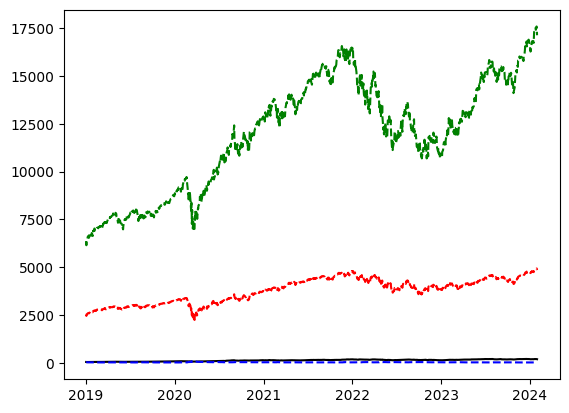

In [45]:
# 분석
# 1. 주요 주가지수가 AAPL 주가에 영향을 주는가?
# S&P 500 지수(^GSPC), 나스닥 100 지수(^NDX), VIX 변동성 지수(^VIX)
import matplotlib.pyplot as plt

PlotDf = data1[['AAPL','S&P500','NASDAQ','VIX']]

plt.plot(data1.index, data1['AAPL'], color='k', )
plt.plot(data1.index, data1['S&P500'], '--', color='r')
plt.plot(data1.index, data1['NASDAQ'], '--', color='g')
plt.plot(data1.index, data1['VIX'], '--', color='b')
plt.show()

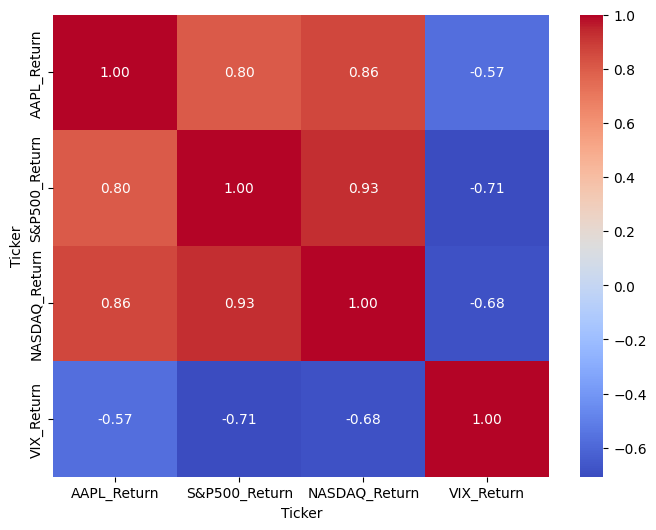

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import warnings

# 경고문 미출력 설정
warnings.filterwarnings('ignore')

# 일일 수익률 계산(변동률)
PlotDf['AAPL_Return'] = PlotDf['AAPL'].pct_change() * 100
PlotDf['S&P500_Return'] = PlotDf['S&P500'].pct_change() * 100
PlotDf['NASDAQ_Return'] = PlotDf['NASDAQ'].pct_change() * 100
PlotDf['VIX_Return'] = PlotDf['VIX'].pct_change() * 100

# 변동률 데이터 사용
correlation = PlotDf[['AAPL_Return', 'S&P500_Return', 'NASDAQ_Return', 'VIX_Return']].corr()

# 상관관계 히트맵 그리기
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

apple 주가 상관 관계
- s&p500: 0.80로 강한 양의 상관관계
- nasdaq: 0.86로 강한 양의 상관관계
- vix: -0.57로 강한 음의 상관관계

결론: 3 데이터 모두 주가에 영향을 주는 데이터

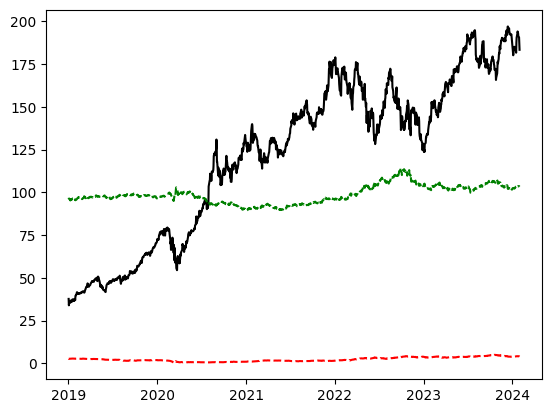

In [47]:
# 2. 거시경제(경제 상황)가 AAPL 주가에 영향을 주는가?
# 미국 국채 금리(^TNX), 미국 달러 인덱스(DX-Y.NYB)
import matplotlib.pyplot as plt

PlotDf = data1[['AAPL','Bond','Dollar']]

plt.plot(PlotDf.index, PlotDf['AAPL'], color='k', )
plt.plot(PlotDf.index, PlotDf['Bond'], '--', color='r')
plt.plot(PlotDf.index, PlotDf['Dollar'], '--', color='g')
plt.show()

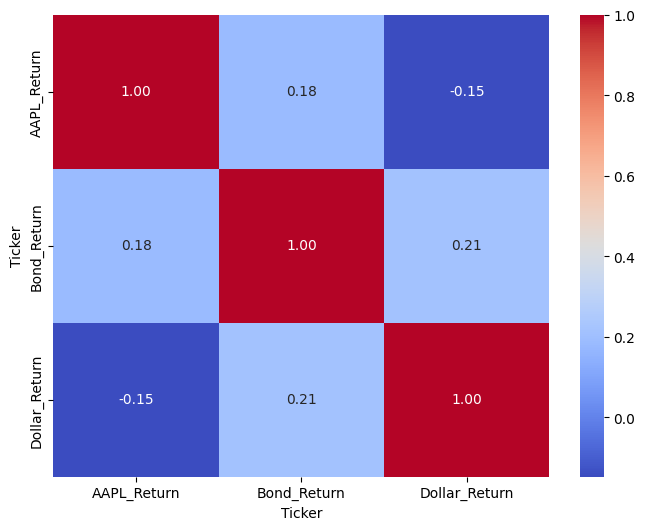

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import warnings

# 경고문 미출력 설정
warnings.filterwarnings('ignore')

# 일일 수익률 계산(변동률)
# 수익률 계산식: (오늘 종가 - 어제 종가) / 어제 종가 * 100
PlotDf['AAPL_Return'] = PlotDf['AAPL'].pct_change() * 100
PlotDf['Bond_Return'] = PlotDf['Bond'].pct_change() * 100
PlotDf['Dollar_Return'] = PlotDf['Dollar'].pct_change() * 100

# 상관관계 계산
correlation = PlotDf[['AAPL_Return', 'Bond_Return', 'Dollar_Return']].corr()

# 상관관계 히트맵 그리기
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

apple 주가 상관 관계
- 미국 국체 금리: 0.18로 약한 양의 상관관계
- 미국 달러 지수: -0.15로 약한 음의 상관관계

결론: 2 데이터 모두 주가에 미약한 영향을 주는 데이터

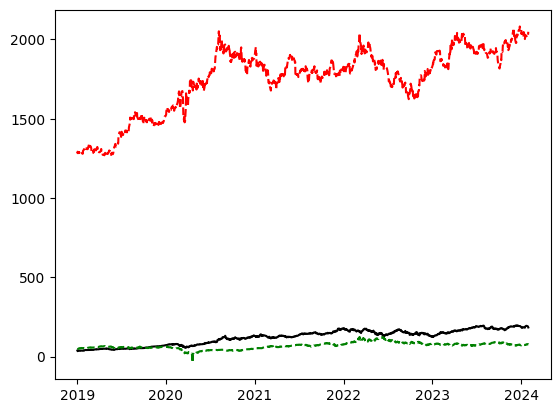

In [49]:
# 3. 원자재 가격(인플레이션 및 제조 비용)가 AAPL 주가에 영향을 주는가?
# 금 가격(GC=F), WTI원유(CL=F)
import matplotlib.pyplot as plt

PlotDf = data1[['AAPL','Gold','Oil']]

plt.plot(PlotDf.index, PlotDf['AAPL'], color='k', )
plt.plot(PlotDf.index, PlotDf['Gold'], '--', color='r')
plt.plot(PlotDf.index, PlotDf['Oil'], '--', color='g')
plt.show()

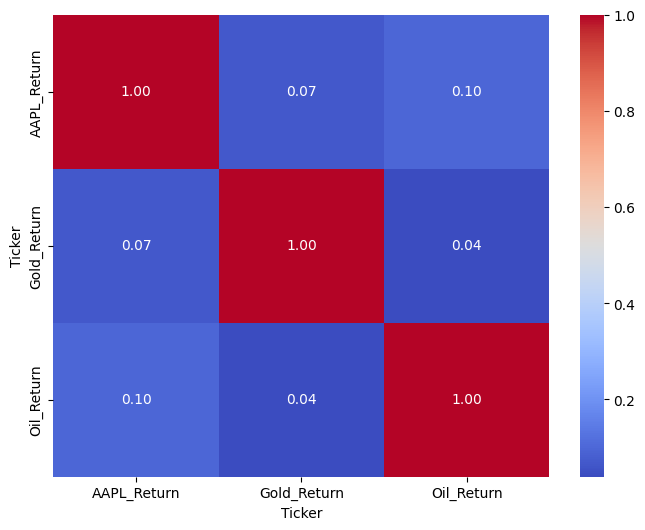

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import warnings

# 경고문 미출력 설정
warnings.filterwarnings('ignore')

# 일일 수익률 계산(변동률)
PlotDf['AAPL_Return'] = PlotDf['AAPL'].pct_change() * 100
PlotDf['Gold_Return'] = PlotDf['Gold'].pct_change() * 100
PlotDf['Oil_Return'] = PlotDf['Oil'].pct_change() * 100

# 상관관계 계산
correlation = PlotDf[['AAPL_Return', 'Gold_Return', 'Oil_Return']].corr()

# 상관관계 히트맵 그리기
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

apple 주가 상관 관계
- 금: 0.07로 약한 양의 상관관계
- 원유: 0.10로 약한 양의 상관관계

결론: 2 데이터 모두 주가에 미약한 영향을 주는 데이터

In [51]:
use = ['AAPL', 'S&P500', 'NASDAQ', 'VIX', 'Volume']
Data = data1[use]
Data

Ticker,AAPL,S&P500,NASDAQ,VIX,Volume
Date,,,,,
2019-01-02,37.667183,2510.030029,6360.870117,23.219999,148158800
2019-01-03,33.915241,2447.889893,6147.129883,25.450001,365248800
2019-01-04,35.363075,2531.939941,6422.669922,21.379999,234428400
2019-01-07,35.284355,2549.689941,6488.250000,21.400000,219111200
2019-01-08,35.956985,2574.409912,6551.850098,20.469999,164101200
...,...,...,...,...,...
2024-01-25,193.011169,4894.160156,17516.990234,13.450000,54822100
2024-01-26,191.271622,4890.970215,17421.009766,13.260000,44594000
2024-01-29,190.585724,4927.930176,17596.269531,13.600000,47145600


In [62]:
Data["Next_Month_Return"] = 0
for i in range(len(Data) - 21):
  Data.iloc[i+21, -1] = Data[i:i+21]['AAPL'].mean()
Data

Ticker,AAPL,S&P500,NASDAQ,VIX,Volume,Next_Month_Return
Date,,,,,,
2019-01-02,37.667183,2510.030029,6360.870117,23.219999,148158800,0.000000
2019-01-03,33.915241,2447.889893,6147.129883,25.450001,365248800,0.000000
2019-01-04,35.363075,2531.939941,6422.669922,21.379999,234428400,0.000000
2019-01-07,35.284355,2549.689941,6488.250000,21.400000,219111200,0.000000
2019-01-08,35.956985,2574.409912,6551.850098,20.469999,164101200,0.000000
...,...,...,...,...,...,...
2024-01-25,193.011169,4894.160156,17516.990234,13.450000,54822100,187.321056
2024-01-26,191.271622,4890.970215,17421.009766,13.260000,44594000,187.348036
2024-01-29,190.585724,4927.930176,17596.269531,13.600000,47145600,187.318214


In [63]:
# 추가 데이터
# 이동 평균 추가(추세 확인용)
# Data["AAPL_50MA"] = Data["AAPL"].rolling(window=50).mean()
# Data["AAPL_200MA"] = Data["AAPL"].rolling(window=200).mean()
Data

Ticker,AAPL,S&P500,NASDAQ,VIX,Volume,Next_Month_Return
Date,,,,,,
2019-01-02,37.667183,2510.030029,6360.870117,23.219999,148158800,0.000000
2019-01-03,33.915241,2447.889893,6147.129883,25.450001,365248800,0.000000
2019-01-04,35.363075,2531.939941,6422.669922,21.379999,234428400,0.000000
2019-01-07,35.284355,2549.689941,6488.250000,21.400000,219111200,0.000000
2019-01-08,35.956985,2574.409912,6551.850098,20.469999,164101200,0.000000
...,...,...,...,...,...,...
2024-01-25,193.011169,4894.160156,17516.990234,13.450000,54822100,187.321056
2024-01-26,191.271622,4890.970215,17421.009766,13.260000,44594000,187.348036
2024-01-29,190.585724,4927.930176,17596.269531,13.600000,47145600,187.318214


In [73]:
# 학습 데이터 준비
features = ['AAPL', 'S&P500', 'NASDAQ', 'VIX', 'Volume']
X = Data[features]
y = Data.loc[Data['Next_Month_Return'] != 0, 'Next_Month_Return']
print(f'Data: {len(Data)}, X: {len(X)}, y: {len(y)}')

# 정규화
# y는 %값임으로 정규화 불필요
def Normalization(df, columns):
  DictMin = {}
  DictMax = {}
  for column in columns:
    MinValue = df[column].min()
    MaxValue = df[column].max()

    DictMin[column] = MinValue
    DictMax[column] = MaxValue

    df[column] = (df[column] - MinValue) / (MaxValue - MinValue)

  return df, DictMin, DictMax

X, DictMin, DictMax = Normalization(X, features)

import torch

X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# 데이터 분포 변화를 고려 필요하여 데이터 분활 먼저 진행
# 훈련 80%, 테스트 20%
yindex = int(len(y)*0.8)
Xindex = yindex + 21

yTrain = y[:yindex]
yTest = y[yindex:]
XTrain = X[:Xindex]
XTest = X[yindex:]
print(yTrain.shape, yTest.shape, XTrain.shape, XTest.shape)

# 학습 후 입력 데이터에 원본 데이터의 scaler 적용
def NormalizationFit(df, columns, DictMin, DictMax):
  for column in columns:
    df[column] = (df[column] - DictMin[column]) / (DictMax[column] - DictMin[column])

  return df

Data: 1279, X: 1279, y: 1258
torch.Size([1006]) torch.Size([252]) torch.Size([1027, 5]) torch.Size([273, 5])


In [20]:
# 학습 데이터 준비

features = ['AAPL', 'S&P500', 'NASDAQ', 'VIX', 'Volume']
X = Data[features]
y = Data['Next_Month_Return']

# 데이터 분포 변화를 고려 필요하여 데이터 분활 먼저 진행
# 훈련 80%, 테스트 20%
from sklearn.model_selection import train_test_split

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, shuffle=False)

# 정규화
# y는 %값임으로 정규화 불필요
def StandardScaler(df, columns):
  DictMin = {}
  DictMax = {}
  for column in columns:
    MinValue = df[column].min()
    MaxValue = df[column].max()

    DictMin[column] = MinValue
    DictMax[column] = MaxValue

    df[column] = (df[column] - MinValue) / (MaxValue - MinValue)

  return df, DictMin, DictMax

XTrain, DictMin, DictMax = StandardScaler(XTrain, features)

# 테스트 데이터 및 학습 후 입력 데이터는 모두 학습 데이터의 scaler 적
def StandardScalerFit(df, columns, DictMin, DictMax):
  for column in columns:
    df[column] = (df[column] - DictMin[column]) / (DictMax[column] - DictMin[column])

  return df

XTest = StandardScalerFit(XTest, features, DictMin, DictMax)

---
#미사용

# LSTM

<img width="700" alt="image" src=https://blog.kakaocdn.net/dn/dubUUm/btr2vn7j0HY/2bPbmlcJi8KxHQ27Mrjsk0/img.png>
<img width='700' alt='image' src=https://velog.velcdn.com/images/choonsik_mom/post/5cf21a79-01e4-4f7d-bb12-9af5ef0dcab2/image.png>

목적: 60일 데이터를 통해 61일 종가 예측

학습은 슬라이딩 윈도우 방식:

|X(입력)|Y(타겟)|
|:---------:|:---------:|
|1~60일 주가|61일째 주가|
|2~61일 주가|62일째 주가|
|3~62일 주가|63일째 주가|

<br>
테스트 데이터는 walk forward

|학습 데이터|테스트 데이터|
|:-------:|:---:|
|2015-2017|2018|
|2015-2018|2019|
|2015-2019|2020|
|2015-2020|2021|

https://sangwonyoon.tistory.com/58

In [111]:
# 모델 정의
from torch import nn

class Net1(nn.Module):
  def __init__(self, InputSize, HiddenSize, NumLayers=1):
    super().__init__()

    self.HiddenSize = HiddenSize
    self.NumLayers = NumLayers

    self.lstm = nn.LSTM(input_size=InputSize, hidden_size=HiddenSize, num_layers=NumLayers)

    # 완전 연결층
    self.fc = nn.Linear(HiddenSize, 1)

  def forward(self, x):
    # BatchSize = x.size(0)

    # h0 = torch.zeros(self.NumLayers, BatchSize, self.HiddenSize)
    # c0 = torch.zeros(self.NumLayers, BatchSize, self.HiddenSize)

    h0 = torch.zeros(self.NumLayers, self.HiddenSize)
    c0 = torch.zeros(self.NumLayers, self.HiddenSize)

    LstmOut, (hn, cn) = self.lstm(x, (h0, c0))
    print(LstmOut.shape)
    LastHidden = LstmOut[21:]
    out = self.fc(LastHidden)

    return out

모델 학습

In [112]:
# 모델 학습
# 난수 고정
torch.manual_seed(123)
torch.cuda.manual_seed(123)

# 모델 인스턴스 생성
model1 = Net1(5, 2)

# # 모델 GPU 전송
# model1 = model1.to(device)

# 학습률
lr = 0.01

from torch import nn, optim

# 손실 함수: MSE
criterion = nn.MSELoss()

# 최적화 알고리즘: 경사 하강법
optimizer = optim.SGD(model1.parameters(), lr=lr)

In [90]:
# 모델 내부 파라미터 확인
for parameter in model1.named_parameters():
    print(parameter)

('lstm.weight_ih_l0', Parameter containing:
tensor([[-0.2883,  0.0234, -0.3512,  0.2667, -0.6025],
        [ 0.5183, -0.5140, -0.5622, -0.4468,  0.3202],
        [-0.2613,  0.2646, -0.6001, -0.4290, -0.2596],
        [-0.1390, -0.5394,  0.4630, -0.1668,  0.2270],
        [ 0.5000,  0.1317,  0.1934,  0.6825, -0.3189],
        [ 0.2240, -0.3146,  0.5053,  0.5647, -0.6519],
        [ 0.6036,  0.3377,  0.3081,  0.2911,  0.5878],
        [-0.0934, -0.5980, -0.2029, -0.4980,  0.0467]], requires_grad=True))
('lstm.weight_hh_l0', Parameter containing:
tensor([[-0.1320, -0.3793],
        [-0.0643,  0.6699],
        [-0.0558,  0.0225],
        [-0.1103,  0.1112],
        [ 0.6300,  0.4324],
        [ 0.2510,  0.1537],
        [ 0.1667,  0.2732],
        [-0.0914, -0.6572]], requires_grad=True))
('lstm.bias_ih_l0', Parameter containing:
tensor([-0.4373,  0.6036,  0.0423, -0.5728,  0.1115,  0.5843, -0.6682, -0.4761],
       requires_grad=True))
('lstm.bias_hh_l0', Parameter containing:
tensor([-0.

예측 계산

In [81]:
!pip install torchviz | tail -n 1

In [113]:
# 예측 계산
outputs = model1(XTrain[0].unsqueeze(0))

# 결과 확인
print(outputs)

torch.Size([1, 2])
tensor([], size=(0, 1), grad_fn=<AddmmBackward0>)


손실 함수

nan


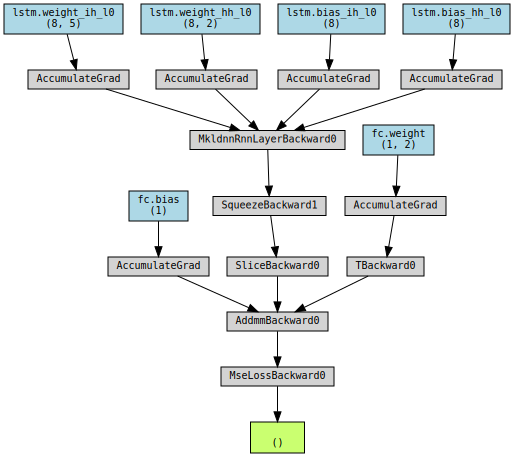

In [114]:
#  손실 계산
loss = criterion(outputs, yTrain[0].reshape(1))

# 손실값 가져오기
print(loss.item())

# 손실 계산 그래프 시각화
from torchviz import make_dot

g = make_dot(loss, params=dict(model1.named_parameters()))
display(g)

반복 계산

In [115]:
# 모델 학습
import numpy as np

inputs = XTrain
labels = yTrain.type(torch.float32)
inputs_test = XTest
labels_test = yTest.type(torch.float32)

# 난수 고정
torch.manual_seed(123)
torch.cuda.manual_seed(123)

# 모델 인스턴스 생성
model1 = Net1(5, 2)

# 학습률
lr = 0.01

from torch import nn, optim

# 손실 함수: MSE
criterion = nn.MSELoss()

# 최적화 알고리즘: 경사 하강법
optimizer = optim.SGD(model1.parameters(), lr=lr)

# 반복 횟수
num_epochs = 500

# 평가 결과 기록
history = np.zeros((0,3))

# tqdm 라이브러리 임포트
from tqdm.notebook import tqdm

# 반복 계산 메인 루프
for epoch in range(num_epochs):
    train_acc, train_loss = 0, 0
    val_acc, val_loss = 0, 0

    # 훈련 페이즈
    # 경사 초기화
    optimizer.zero_grad()

    # 예측 계산
    outputs = model1(inputs)

    # 손실 계산
    loss = criterion(outputs, labels)

    # 경사 계산
    loss.backward()

    # 파라미터 수정
    optimizer.step()

    # 예측 라벨 산출
    predicted = torch.max(outputs, 1)[1]

    # 손실과 정확도 계산
    train_loss = loss.item()

    # 예측 페이즈
    # 예측 계산
    outputs_test = model1(inputs_test)

    # 손실 계산
    loss_test = criterion(outputs_test, labels_test)

    # 예측 라벨 산출
    predicted_test = torch.max(outputs_test, 1)[1]

    # 손실과 정확도 계산
    val_loss =  loss_test.item()

    # 평가 결과 산출, 기록
    print (f'Epoch [{epoch+1}/{num_epochs}], loss: {train_loss:.5f}, val_loss: {val_loss:.5f}')
    item = np.array([epoch+1 , train_loss, val_loss])
    history = np.vstack((history, item))

torch.Size([1027, 2])
torch.Size([273, 2])
Epoch [1/500], loss: 13680.96387, val_loss: 29258.80469
torch.Size([1027, 2])
torch.Size([273, 2])
Epoch [2/500], loss: 13165.09863, val_loss: 28428.72070
torch.Size([1027, 2])
torch.Size([273, 2])
Epoch [3/500], loss: 12650.46777, val_loss: 27330.21680
torch.Size([1027, 2])
torch.Size([273, 2])
Epoch [4/500], loss: 11994.16699, val_loss: 26071.98438
torch.Size([1027, 2])
torch.Size([273, 2])
Epoch [5/500], loss: 11217.68945, val_loss: 24826.10547
torch.Size([1027, 2])
torch.Size([273, 2])
Epoch [6/500], loss: 10465.09375, val_loss: 23593.02148
torch.Size([1027, 2])
torch.Size([273, 2])
Epoch [7/500], loss: 9734.80078, val_loss: 22231.72852
torch.Size([1027, 2])
torch.Size([273, 2])
Epoch [8/500], loss: 8953.79980, val_loss: 20766.74805
torch.Size([1027, 2])
torch.Size([273, 2])
Epoch [9/500], loss: 8129.96777, val_loss: 19427.77539
torch.Size([1027, 2])
torch.Size([273, 2])
Epoch [10/500], loss: 7395.10205, val_loss: 18205.80859
torch.Size([1

결과 확인

In [116]:
# 초기 손실값과 최종 손실값

print(f'초기 손실값: {history[0,1]:.5f}')
print(f'최종 손실값: {history[-1,1]:.5f}')

초기 손실값: 13680.96387
최종 손실값: 1782.08228


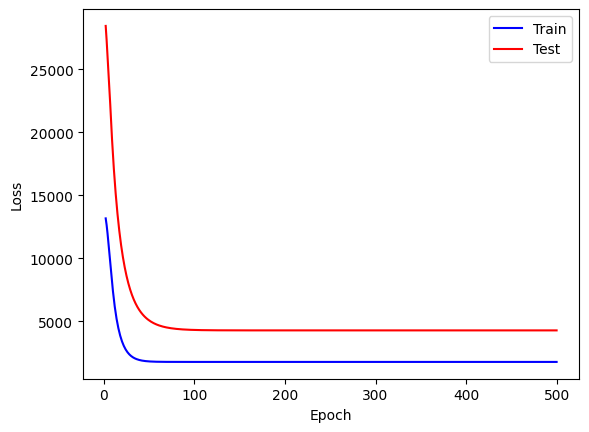

In [118]:
# 학습 곡선 출력(손실)
# 가장 처음 요소는 제외

plt.plot(history[1:,0], history[1:,1], c='b', label='Train')
plt.plot(history[1:,0], history[1:,2], c='r', label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#모델 직접 작성

In [137]:
import torch
import torch.nn as nn

class LSTM1(nn.Module):
  def __init__(self, InputSize, HiddenSize):
    super().__init__()  # nn.Modeule을 사용하기 위해 필요

    self.HiddenSize = HiddenSize
    self.OutputSize = HiddenSize
    WxSize = HiddenSize, InputSize
    WhSize = HiddenSize, HiddenSize

    # gpt:가중치를 직접 텐서로 생성했을 경우 requires_grad=True 설정은 pytorch에서 미권장
    # 따라서 nn.Parameter()를 사용
    self.Wxf = nn.Parameter(torch.randn(WxSize, dtype=torch.float32))
    self.Whf = nn.Parameter(torch.randn(WhSize, dtype=torch.float32))
    self.Bf = nn.Parameter(torch.randn(HiddenSize, dtype=torch.float32))

    self.Wxi = nn.Parameter(torch.randn(WxSize, dtype=torch.float32))
    self.Whi = nn.Parameter(torch.randn(WhSize, dtype=torch.float32))
    self.Bi = nn.Parameter(torch.randn(HiddenSize, dtype=torch.float32))

    self.Wxg = nn.Parameter(torch.randn(WxSize, dtype=torch.float32))
    self.Whg = nn.Parameter(torch.randn(WhSize, dtype=torch.float32))
    self.Bg = nn.Parameter(torch.randn(HiddenSize, dtype=torch.float32))

    self.Wxo = nn.Parameter(torch.randn(WxSize, dtype=torch.float32))
    self.Who = nn.Parameter(torch.randn(WhSize, dtype=torch.float32))
    self.Bo = nn.Parameter(torch.randn(HiddenSize, dtype=torch.float32))

  def CellState(self):
    self.Ct1 = self.Ct1 * self.ForgetGate() + self.InputGate()
    return self.Ct1

  def ForgetGate(self):
    Ft = torch.sigmoid(torch.matmul(self.Wxf, self.Xt.T) + torch.matmul(self.Whf, self.Ht1.T) + self.Bf)
    return Ft

  def InputGate(self):
    It = torch.sigmoid(torch.matmul(self.Wxi, self.Xt.T) + torch.matmul(self.Whi, self.Ht1.T) + self.Bi)
    Gt = torch.tanh(torch.matmul(self.Wxg, self.Xt.T) + torch.matmul(self.Whg, self.Ht1.T) + self.Bg)
    return It * Gt

  def OutputGate(self):
    Ot = torch.sigmoid(torch.matmul(self.Wxo, self.Xt.T) + torch.matmul(self.Who, self.Ht1.T) + self.Bo)
    return Ot

  def forward(self, x):
    SeqLength = x.size(0)

    self.Ct1 = torch.zeros(self.OutputSize, dtype=torch.float32, requires_grad=True)
    self.Ht1 = torch.zeros(self.HiddenSize, dtype=torch.float32, requires_grad=True)

    self.Ht = torch.zeros(SeqLength, self.HiddenSize)
    self.Ct = torch.zeros(SeqLength, self.HiddenSize)

    for i in range(SeqLength):
      self.Xt = x[i]
      self.Ct[i] = self.CellState().clone()
      self.Ht[i] = self.OutputGate() * torch.tanh(self.Ct[i]).clone()

    return self.Ht

In [138]:
# 모델 정의
class Net2(nn.Module):
  def __init__(self, InputSize, HiddenSize):
    super().__init__()

    self.lstm = LSTM1(InputSize, HiddenSize)

    # 완전 연결층
    self.fc = nn.Linear(HiddenSize, 1)

  def forward(self, x):
    LstmOut = self.lstm(x)
    out = self.fc(LstmOut[21:])

    return out

In [139]:
# 모델 학습
# 난수 고정
torch.manual_seed(123)
torch.cuda.manual_seed(123)

# 모델 인스턴스 생성
model2 = Net2(5, 2)

# # 모델 GPU 전송
# model2 = model2.to(device)

# 학습률
lr = 0.01

from torch import nn, optim

# 손실 함수: MSE
criterion = nn.MSELoss()

# 최적화 알고리즘: 경사 하강법
optimizer = optim.SGD(model2.parameters(), lr=lr)

In [123]:
# 모델 내부 파라미터 확인
for parameter in model2.named_parameters():
    print(parameter)

('lstm.Wxf', Parameter containing:
tensor([[-0.1115,  0.1204, -0.3696, -0.2404, -1.1969],
        [ 0.2093, -0.9724, -0.7550,  0.3239, -0.1085]], requires_grad=True))
('lstm.Whf', Parameter containing:
tensor([[ 0.2103, -0.3908],
        [ 0.2350,  0.6653]], requires_grad=True))
('lstm.Bf', Parameter containing:
tensor([0.3528, 0.9728], requires_grad=True))
('lstm.Wxi', Parameter containing:
tensor([[-0.0386, -0.8861, -0.4709, -0.4269, -0.0283],
        [ 1.4220, -0.3886, -0.8903, -0.9601, -0.4087]], requires_grad=True))
('lstm.Whi', Parameter containing:
tensor([[ 1.0764, -0.4015],
        [-0.7291, -0.1218]], requires_grad=True))
('lstm.Bi', Parameter containing:
tensor([-0.4796, -0.5166], requires_grad=True))
('lstm.Wxg', Parameter containing:
tensor([[-0.3107,  0.2057,  0.9657,  0.7057,  0.7290],
        [ 1.2775, -1.0815, -1.3027,  1.0827, -1.3841]], requires_grad=True))
('lstm.Whg', Parameter containing:
tensor([[ 0.4033, -1.2239],
        [ 0.7017,  2.2139]], requires_grad=True)

예측 계산

In [ ]:
!pip install torchviz | tail -n 1

In [135]:
XTrain[0].unsqueeze(0).shape

torch.Size([1, 5])

In [140]:
# 예측 계산
outputs = model2(XTrain[0].unsqueeze(0))

# 결과 확인
print(outputs)

1
tensor([], size=(0, 1), grad_fn=<AddmmBackward0>)


손실 함수

nan


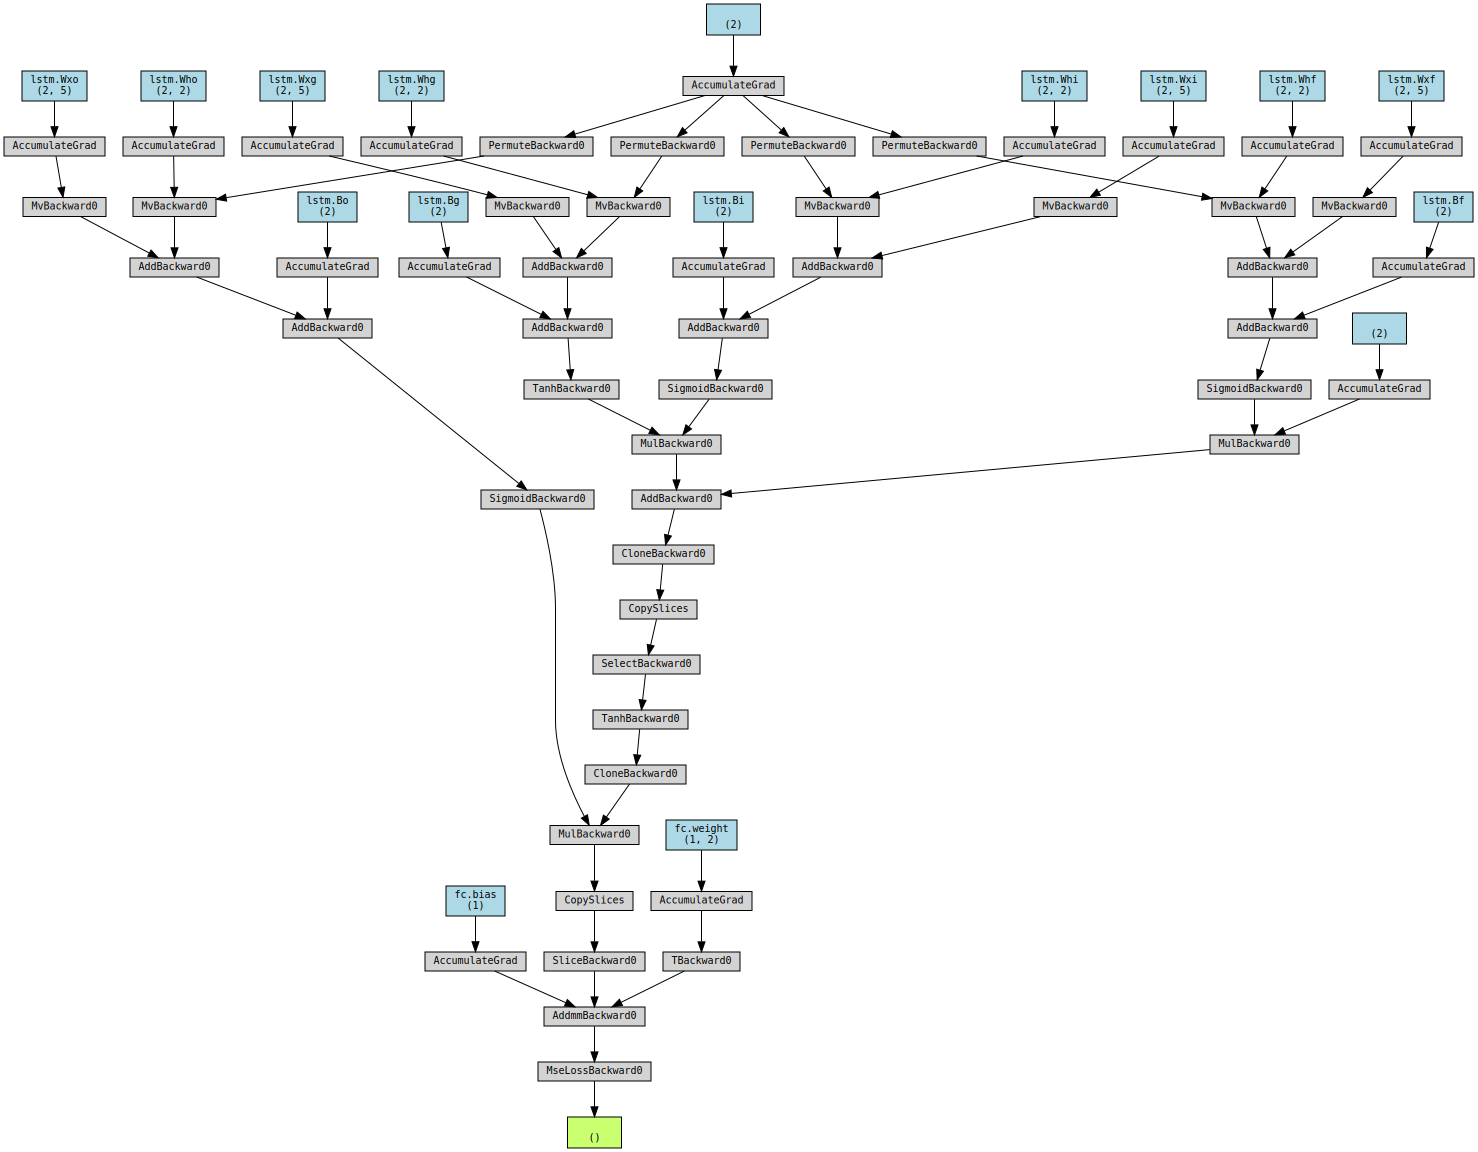

In [141]:
#  손실 계산
loss = criterion(outputs, yTrain[0].reshape(1))

# 손실값 가져오기
print(loss.item())

# 손실 계산 그래프 시각화
from torchviz import make_dot

g = make_dot(loss, params=dict(model2.named_parameters()))
display(g)

반복 학습

In [142]:
# 모델 학습
import numpy as np

inputs = XTrain
labels = yTrain.type(torch.float32)
inputs_test = XTest
labels_test = yTest.type(torch.float32)

# 난수 고정
torch.manual_seed(123)
torch.cuda.manual_seed(123)

# 모델 인스턴스 생성
model2 = Net2(5, 2)

# 학습률
lr = 0.01

from torch import nn, optim

# 손실 함수: MSE
criterion = nn.MSELoss()

# 최적화 알고리즘: 경사 하강법
optimizer = optim.SGD(model2.parameters(), lr=lr)

# 반복 횟수
num_epochs = 500

# 평가 결과 기록
history = np.zeros((0,3))

# tqdm 라이브러리 임포트
from tqdm.notebook import tqdm

# 반복 계산 메인 루프
for epoch in range(num_epochs):
    train_acc, train_loss = 0, 0
    val_acc, val_loss = 0, 0

    # 훈련 페이즈
    # 경사 초기화
    optimizer.zero_grad()

    # 예측 계산
    outputs = model2(inputs)

    # 손실 계산
    loss = criterion(outputs, labels)

    # 경사 계산
    loss.backward()

    # 파라미터 수정
    optimizer.step()

    # 예측 라벨 산출
    predicted = torch.max(outputs, 1)[1]

    # 손실과 정확도 계산
    train_loss = loss.item()

    # 예측 페이즈
    # 예측 계산
    outputs_test = model2(inputs_test)

    # 손실 계산
    loss_test = criterion(outputs_test, labels_test)

    # 예측 라벨 산출
    predicted_test = torch.max(outputs_test, 1)[1]

    # 손실과 정확도 계산
    val_loss =  loss_test.item()

    # 평가 결과 산출, 기록
    print (f'Epoch [{epoch+1}/{num_epochs}], loss: {train_loss:.5f}, val_loss: {val_loss:.5f}')
    item = np.array([epoch+1 , train_loss, val_loss])
    history = np.vstack((history, item))

1027
273
Epoch [1/500], loss: 13765.62695, val_loss: 29360.74609
1027
273
Epoch [2/500], loss: 13244.83203, val_loss: 28381.56445
1027
273
Epoch [3/500], loss: 12660.39941, val_loss: 26949.84961
1027
273
Epoch [4/500], loss: 11833.29590, val_loss: 25262.22852
1027
273
Epoch [5/500], loss: 10803.48242, val_loss: 23573.43555
1027
273
Epoch [6/500], loss: 9788.60645, val_loss: 21999.46680
1027
273
Epoch [7/500], loss: 8867.77539, val_loss: 20555.39062
1027
273
Epoch [8/500], loss: 8047.62500, val_loss: 19236.66992
1027
273
Epoch [9/500], loss: 7320.61963, val_loss: 18034.09180
1027
273
Epoch [10/500], loss: 6677.22852, val_loss: 16937.63086
1027
273
Epoch [11/500], loss: 6108.22314, val_loss: 15937.58984
1027
273
Epoch [12/500], loss: 5605.17139, val_loss: 15024.95703
1027
273
Epoch [13/500], loss: 5160.51123, val_loss: 14191.49219
1027
273
Epoch [14/500], loss: 4767.50635, val_loss: 13429.72559
1027
273
Epoch [15/500], loss: 4420.17969, val_loss: 12732.90234
1027
273
Epoch [16/500], loss

결과 확인

In [143]:
# 초기 손실값과 최종 손실값

print(f'초기 손실값: {history[0,1]:.5f}')
print(f'최종 손실값: {history[-1,1]:.5f}')

초기 손실값: 13765.62695
최종 손실값: 1782.09399


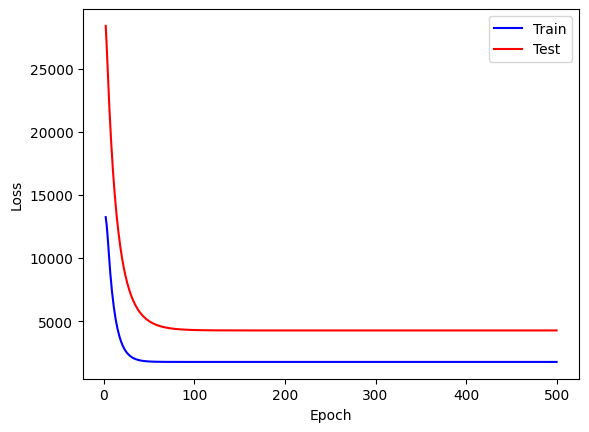

In [144]:
# 학습 곡선 출력(손실)
# 가장 처음 요소는 제외

plt.plot(history[1:,0], history[1:,1], c='b', label='Train')
plt.plot(history[1:,0], history[1:,2], c='r', label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

---
#GRU

In [ ]:
class GRU(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(GRU, self).__init__()
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length

        # GRU 레이어
        self.gru = nn.GRU(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True)

        # 완전 연결층
        self.fc_1 = nn.Linear(hidden_size, 128)
        self.fc = nn.Linear(128, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        # 초기 은닉 상태 설정 (device에 맞게 초기화)
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # GRU 레이어 통과
        output, hn = self.gru(x, h_0)

        # hn은 가장 마지막 레이어의 출력을 사용
        hn = hn[-1]

        # 완전 연결층을 통과
        out = self.relu(hn)
        out = self.fc_1(out)
        out = self.relu(out)
        out = self.fc(out)

        return out


# 하이퍼파라미터 설정
num_epochs = 10000
learning_rate = 0.0001

input_size = 5  # 입력 특징 수
hidden_size = 2  # GRU의 은닉 상태 크기
num_layers = 1  # GRU 레이어 수
num_classes = 1  # 출력 클래스 수

# 모델 초기화
model = GRU(num_classes, input_size, hidden_size, num_layers, X_train_tensors_f.shape[1])

튜닝
- 심층
- 최적화 함수 병경
- 과적합 방지
 - dropout
 - 배치 정규화
 - 데이터 증강

---

In [ ]:
import os
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

data = pd.read_csv('./SBUX.csv')
print(data.dtypes)
print(data)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
           Date        Open        High         Low       Close   Adj Close  \
0    2019-12-11   86.260002   86.870003   85.849998   86.589996   84.145752   
1    2019-12-12   88.000000   88.889999   87.540001   88.209999   85.720032   
2    2019-12-13   88.019997   88.790001   87.580002   88.669998   86.167046   
3    2019-12-16   89.139999   89.300003   88.430000   88.779999   86.273941   
4    2019-12-17   88.870003   88.970001   87.470001   88.129997   85.642288   
..          ...         ...         ...         ...         ...         ...   
248  2020-12-04  101.349998  102.940002  101.070000  102.279999  101.442787   
249  2020-12-07  102.010002  102.220001  100.690002  101.410004  100.579918   
250  2020-12-08  100.370003  101.570000  100.010002  101.209999  100.381554   
251  2020-12-09  101.940002  102.209999  100.0999

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data['Volume'] = data['Volume'].astype(float)

X = data.iloc[:, :-1]
y = data.iloc[:, 5:6]
print(X)
print(y)

                  Open        High         Low       Close   Adj Close
Date                                                                  
2019-12-11   86.260002   86.870003   85.849998   86.589996   84.145752
2019-12-12   88.000000   88.889999   87.540001   88.209999   85.720032
2019-12-13   88.019997   88.790001   87.580002   88.669998   86.167046
2019-12-16   89.139999   89.300003   88.430000   88.779999   86.273941
2019-12-17   88.870003   88.970001   87.470001   88.129997   85.642288
...                ...         ...         ...         ...         ...
2020-12-04  101.349998  102.940002  101.070000  102.279999  101.442787
2020-12-07  102.010002  102.220001  100.690002  101.410004  100.579918
2020-12-08  100.370003  101.570000  100.010002  101.209999  100.381554
2020-12-09  101.940002  102.209999  100.099998  100.400002   99.578186
2020-12-10  103.510002  106.089996  102.750000  105.389999  104.527336

[253 rows x 5 columns]
                Volume
Date                  
2019-12

In [ ]:
ms = MinMaxScaler()
ss = StandardScaler()

X_ss = ss.fit_transform(X)
y_ms = ms.fit_transform(y)

X_train = X_ss[:200, :]
X_test = X_ss[200:, :]

y_train = y_ms[:200, :]
y_test = y_ms[200:, :]

print('Training Shape :', X_train.shape, y_train.shape)
print('Testing Shape :', X_test.shape, y_test.shape)

Training Shape : (200, 5) (200, 1)
Testing Shape : (53, 5) (53, 1)


In [ ]:
# 데이터셋 형태, 크기 조정
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

X_train_tensors_f = torch.reshape(X_train_tensors, (X_train_tensors.shape[0],
                                                  1, X_train_tensors.shape[1]))
X_test_tensors_f = torch.reshape(X_test_tensors, (X_test_tensors.shape[0],
                                                 1, X_test_tensors.shape[1]))

print('Training Shape :', X_train_tensors_f.shape, y_train_tensors.shape)
print('Testing Shape :', X_test_tensors_f.shape, y_test_tensors.shape)

Training Shape : torch.Size([200, 1, 5]) torch.Size([200, 1])
Testing Shape : torch.Size([53, 1, 5]) torch.Size([53, 1])


In [ ]:
class LSTM(nn.Module) :
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length) :
        super(LSTM, self).__init__()
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                           num_layers=num_layers, batch_first=True)
        self.fc_1 = nn.Linear(hidden_size, 128)
        self.fc = nn.Linear(128, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x) :
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        output, (hn, cn) = self.lstm(x, (h_0, c_0))
        hn = hn.view(-1, self.hidden_size)
        out = self.relu(hn)
        out = self.fc_1(out)
        out = self.relu(out)
        out = self.fc(out)
        return out

In [ ]:
# 변수값 설정
num_epochs = 1000
lr = 0.0001

input_size=5
hidden_size=2
num_layers=1

num_classes=1
model = LSTM(num_classes, input_size, hidden_size, num_layers, X_train_tensors_f.shape[1])

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
for epoch in range(num_epochs) :
    outputs = model.forward(X_train_tensors_f)
    optimizer.zero_grad()
    loss = criterion(outputs, y_train_tensors)
    loss.backward()

    optimizer.step()
    if epoch % 100 == 0 :
        print(f'Epoch : {epoch}, loss : {loss.item():1.5f}')

In [ ]:
df_x_ss = ss.transform(data.iloc[:, :-1])
df_y_ms = ms.transform(data.iloc[:, -1:])

df_x_ss = Variable(torch.Tensor(df_x_ss))
df_y_ms = Variable(torch.Tensor(df_y_ms))
df_x_ss = torch.reshape(df_x_ss, (df_x_ss.shape[0], 1, df_x_ss.shape[1]))
train_predict = model(df_x_ss)
predicted = train_predict.data.numpy()
label_y = df_y_ms.data.numpy()

predicted = ms.inverse_transform(predicted)
label_y = ms.inverse_transform(label_y)
plt.figure(figsize=(10, 6))
plt.axvline(x=200, c='r', linestyle='--')

plt.plot(label_y, label='Actual Data')
plt.plot(predicted, label='Predicted Data')
plt.title('Time-Series Prediction')
plt.legend()
plt.show()